In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [2]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('Fake.csv')

In [4]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot: xlabel='subject', ylabel='count'>

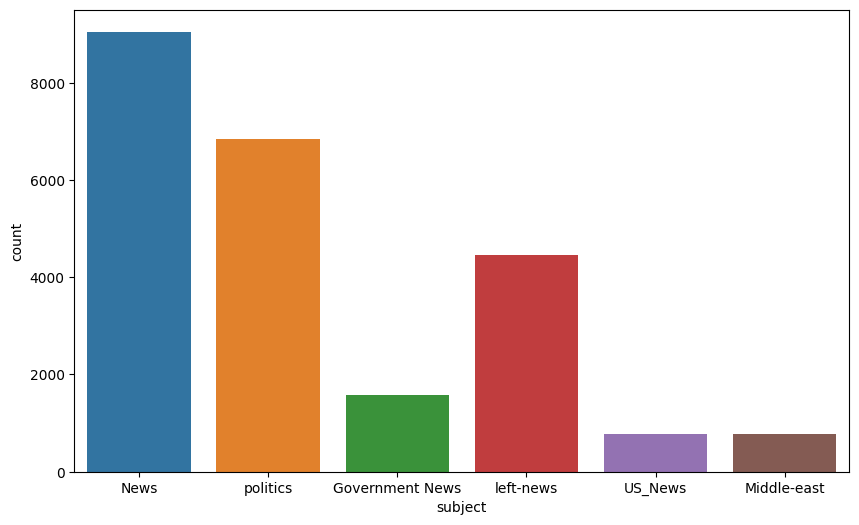

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

In [8]:
text= ' ' .join(fake['text'].tolist()) ## joined all text data with space


In [9]:
' '.join(['this' , 'is', 'a', 'data']) ## eg how text data is joined with space

'this is a data'

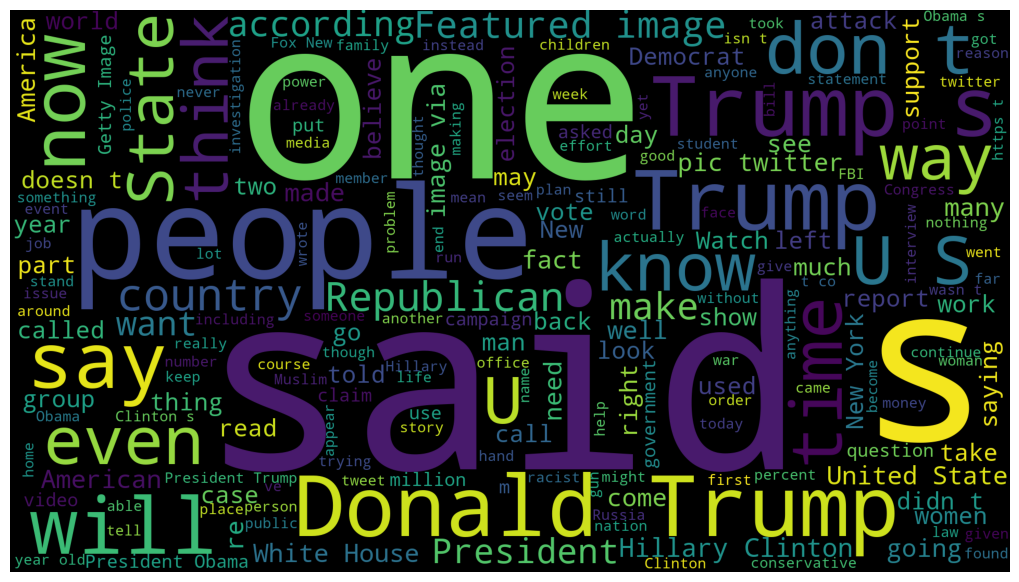

In [10]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Real News Analysis

In [11]:
real= pd.read_csv('True.csv')

In [12]:
text = ' '.join(real['text'].tolist())

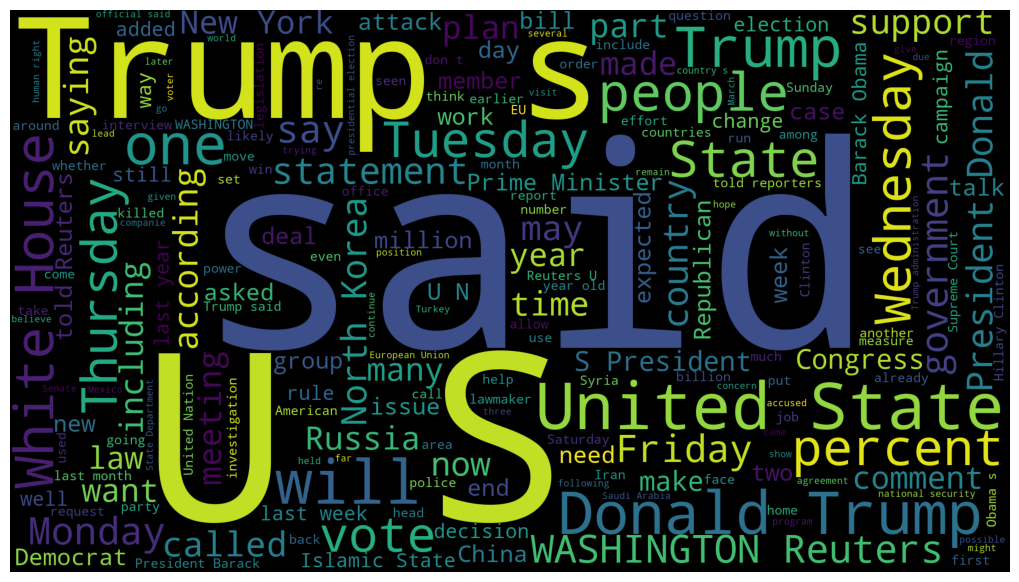

In [13]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
real.sample(5)

title  \
1916   Trump to scrap protection for 'Dreamers,' give...   
11839  U.N. decries Israel's killing of Gaza amputee,...   
9213   Sanders praises Obama, Biden for impartiality,...   
12266  Exclusive: U.S. suspends aid to Somalia's batt...   
2563   Republican Senate leader to hold healthcare vo...   

                                                    text       subject  \
1916   WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
11839  GENEVA (Reuters) - A senior U.N. official said...     worldnews   
9213   WASHINGTON (Reuters) - U.S. Democratic preside...  politicsNews   
12266  NAIROBI (Reuters) - The United States is suspe...     worldnews   
2563   WASHINGTON (Reuters) - U.S. Senate Republican ...  politicsNews   

                     date  
1916   September 4, 2017   
11839  December 19, 2017   
9213        June 9, 2016   
12266  December 14, 2017   
2563       July 25, 2017

In [15]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split(' - ', maxsplit= 1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [16]:
len(unknown_publishers)

229

In [17]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [18]:
real.iloc[8]

title             Trump on Twitter (Dec 28) - Global Warming
text       The following statements were posted to the ve...
subject                                         politicsNews
date                                      December 29, 2017 
Name: 8, dtype: object

In [19]:
publisher = []
tmp_text = []
for index , row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('unknown')
  else:
    record = row.split(' - ', maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [20]:
real['publisher']= publisher
real['text']= tmp_text


In [21]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [22]:
real.shape

(21417, 5)

In [23]:
empty_fake_index = [index for index, text in enumerate (fake.text.tolist()) if str(text).strip()==""]

In [24]:
fake.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [25]:
real['text'] = real['title'] + " " + real['text']
fake['text'] =  fake['title']+" " + fake['text']

In [26]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

#### Preprocessing Text

In [27]:
real['class']=1
fake['class']=0

In [28]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [29]:
real=real[['text','class']]

In [30]:
fake= fake[['text', 'class']]

In [31]:
data=real.append(fake,ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_340\1598362680.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake,ignore_index=True)


In [32]:
data.sample(5)

text  class
7566   clinton leads trump by 2 points in fox news po...      1
15062  trump says he trusts putin's denials of electi...      1
26324   here’s what black voters think of donald trum...      0
42458  bernie sanders’ economic policy explained in o...      0
33187  tucker carlson rips into pro-refugee leader: “...      0

In [33]:
import preprocess_kgptalkie as ps

In [34]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [35]:
ps.remove_special_chars('this , . @ # is gre@t' )

'this is gret'

In [36]:
import gensim


In [37]:
y = data['class'].values

In [38]:
X=[d.split() for d in data['text'].tolist()]

In [39]:
type(X[0])

list

In [40]:

DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [47]:
len(w2v_model.wv.key_to_index)

231902

In [48]:
w2v_model.wv.key_to_index

{'the': 0,
 'to': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 'that': 6,
 'on': 7,
 'for': 8,
 's': 9,
 'is': 10,
 'he': 11,
 'said': 12,
 'trump': 13,
 'it': 14,
 'with': 15,
 'was': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'has': 20,
 'be': 21,
 'have': 22,
 'not': 23,
 'from': 24,
 'this': 25,
 'at': 26,
 'are': 27,
 'who': 28,
 'us': 29,
 'an': 30,
 'they': 31,
 'i': 32,
 'but': 33,
 'we': 34,
 'would': 35,
 'president': 36,
 'about': 37,
 'will': 38,
 'their': 39,
 'had': 40,
 'you': 41,
 't': 42,
 'been': 43,
 'were': 44,
 'people': 45,
 'more': 46,
 'or': 47,
 'after': 48,
 'which': 49,
 'she': 50,
 'her': 51,
 'one': 52,
 'if': 53,
 'its': 54,
 'out': 55,
 'all': 56,
 'what': 57,
 'state': 58,
 'when': 59,
 'new': 60,
 'also': 61,
 'up': 62,
 'there': 63,
 'over': 64,
 'no': 65,
 'house': 66,
 'donald': 67,
 'our': 68,
 'states': 69,
 'clinton': 70,
 'obama': 71,
 'government': 72,
 'can': 73,
 'just': 74,
 'him': 75,
 'so': 76,
 'than': 77,
 'republican': 78,
 'other': 79,
 'som

In [49]:
w2v_model.wv['love']

array([ 3.3402183 ,  2.4169872 ,  2.185201  , -4.0415106 ,  1.2990453 ,
       -0.6144411 , -0.45490193,  3.3632298 ,  0.09032841,  1.794091  ,
       -1.1823305 , -0.02733193, -3.2738352 , -1.4263865 , -0.5633883 ,
       -2.693686  , -0.55497   ,  1.3588367 ,  2.7476792 ,  1.1535454 ,
       -2.5181637 ,  1.7122897 , -0.29251182,  3.909487  , -1.1662142 ,
        3.1394887 ,  0.54728585, -1.4919933 , -0.24953769, -5.7529936 ,
        2.0575967 , -2.6177247 ,  0.45983124,  0.2472026 , -1.1539817 ,
        0.14635919,  1.9513435 ,  0.2648774 ,  1.6895064 , -1.206051  ,
        0.1484797 , -2.449033  , -5.744594  ,  1.3457432 , -1.9217505 ,
       -1.0817711 ,  1.811818  , -1.7347699 ,  1.579245  , -1.6302024 ,
       -0.57706875,  2.8144202 ,  3.6203    , -0.78092146,  2.2516568 ,
        0.11793403, -2.4380744 ,  1.7230544 , -4.2601438 , -0.45451537,
       -1.4701968 , -2.0638933 ,  0.9729859 , -0.409459  , -1.5897392 ,
        0.04363336,  0.9988482 ,  3.4364994 , -1.9864255 ,  0.89

In [50]:
w2v_model.wv['china']

array([-5.6499996 ,  0.2910009 ,  0.01623304,  5.323652  ,  1.3204491 ,
        0.44325033, -2.1791344 , -0.80734056,  0.09065372,  5.3405266 ,
        3.7470899 ,  2.2659097 , -1.3070786 ,  1.9436674 , -0.45874277,
        3.3589468 ,  1.1448077 , -0.7284086 , -4.753448  , -2.0651338 ,
        2.6793025 ,  3.4007177 ,  1.1808299 , -0.17504396,  1.1656848 ,
        2.2679644 ,  0.12806056,  0.33754772, -0.6067494 ,  0.188497  ,
        3.2930481 , -2.6648417 ,  2.3343427 , -1.1285411 , -1.161984  ,
       -0.7481808 , -3.4768696 ,  0.20088542,  0.5232087 ,  1.8186973 ,
        4.8957233 , -3.671721  ,  0.95109504, -3.7074318 , -2.7639616 ,
       -3.5036695 ,  1.3112427 , -0.3219654 ,  1.4940361 , -1.7658516 ,
        0.39544052,  2.391633  , -2.1822913 ,  0.7891235 , -2.3239675 ,
        0.01652028,  1.7054694 ,  2.7471945 , -0.68507093, -1.228966  ,
       -3.4375799 ,  4.014747  , -3.1283638 , -3.902029  ,  0.47485283,
        0.6732222 , -1.0255269 ,  1.0506641 ,  0.59740794, -3.33

In [51]:
w2v_model.wv.most_similar('india')

[('malaysia', 0.723082423210144),
 ('pakistan', 0.7037211656570435),
 ('indian', 0.6710259914398193),
 ('china', 0.6555986404418945),
 ('australia', 0.6195133924484253),
 ('indonesia', 0.6125971674919128),
 ('beijings', 0.6120121479034424),
 ('norway', 0.6098288297653198),
 ('indias', 0.6086789965629578),
 ('modi', 0.6050667762756348)]

In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [53]:
X = tokenizer.texts_to_sequences(X)

In [54]:
X

[[18,
  30,
  473,
  480,
  10667,
  133,
  8088,
  40,
  1375,
  5172,
  1,
  419,
  3,
  4,
  301,
  79,
  6312,
  6,
  1,
  30,
  189,
  29,
  773,
  26,
  279,
  9,
  4,
  1107,
  2956,
  3,
  1,
  124,
  954,
  2,
  447,
  9,
  184,
  1193,
  173,
  394,
  4,
  1375,
  301,
  8,
  342,
  5,
  1110,
  473,
  7804,
  6,
  1188,
  6,
  1764,
  16,
  4,
  3407,
  7896,
  141,
  164,
  320,
  133,
  30,
  798,
  921,
  7805,
  675,
  8,
  2010,
  476,
  1,
  383,
  1761,
  4,
  559,
  589,
  8,
  168,
  691,
  50,
  408,
  28,
  17340,
  2,
  89,
  1352,
  65,
  6,
  410,
  60,
  32,
  776,
  25,
  1,
  8089,
  8,
  203,
  408,
  39,
  1438,
  350,
  2,
  929,
  4,
  168,
  473,
  6,
  4,
  480,
  304,
  2,
  22,
  1957,
  2,
  80,
  426,
  170,
  18,
  313,
  208,
  107,
  18,
  1,
  515,
  570,
  96,
  1781,
  1504,
  6,
  50,
  133,
  39,
  1072,
  2,
  377,
  349,
  3,
  189,
  37,
  68,
  14,
  5,
  19,
  133,
  182,
  4,
  379,
  473,
  959,
  6,
  169,
  691,
  110,
  196,
  62,

In [55]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [56]:
[len(x) for x in X]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

<function matplotlib.pyplot.show(close=None, block=None)>

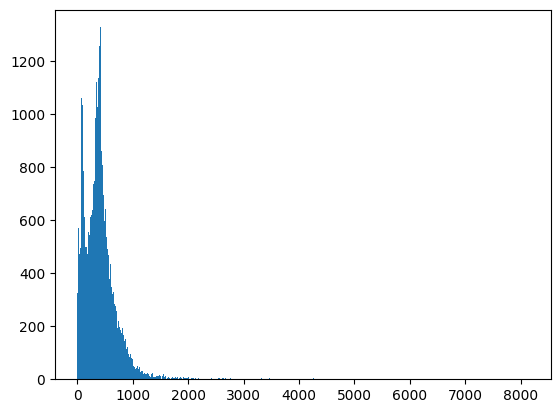

In [57]:
plt.hist([len(x) for x in X],bins=700)
plt.show

In [58]:
nos=np.array([len(x) for x in X ])
len(nos[nos>1000])

1584

In [59]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [60]:
len(X[101])

1000

In [61]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [62]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))

    for word, i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix

In [63]:
embedding_vectors=get_weight_matrix(w2v_model)

In [64]:
embedding_vectors.shape

(231903, 100)

In [65]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights = [embedding_vectors],input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23190300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,307,677
Trainable params: 117,377
Non-trainable params: 23,190,300
_________________________________________________________________


In [67]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [68]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 6)

Epoch 1/6
737/737 [==============================] - 510s 689ms/step - loss: 0.1477 - acc: 0.9463 - val_loss: 0.0853 - val_acc: 0.9703
Epoch 2/6
737/737 [==============================] - 553s 751ms/step - loss: 0.0630 - acc: 0.9800 - val_loss: 0.0439 - val_acc: 0.9860
Epoch 3/6
737/737 [==============================] - 516s 700ms/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0270 - val_acc: 0.9915
Epoch 4/6
737/737 [==============================] - 546s 741ms/step - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0232 - val_acc: 0.9928
Epoch 5/6
737/737 [==============================] - 594s 806ms/step - loss: 0.0186 - acc: 0.9946 - val_loss: 0.0229 - val_acc: 0.9921
Epoch 6/6
737/737 [==============================] - 1012s 1s/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0268 - val_acc: 0.9939


In [69]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 131s 359ms/step


In [70]:
accuracy_score(y_test, y_pred)

0.9944766146993318

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5813
           1       1.00      0.99      0.99      5412

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [2]:
x= ['this is a news']

In [3]:
X_test

NameError: name 'X_test' is not defined

In [1]:
len(tokenizer.texts_to_matrix(x)[0])

NameError: name 'tokenizer' is not defined

In [78]:
x= ['Back Ukraine President Zelensky writes to PM Modi, seeks more humanitarian aid']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [79]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 86ms/step


array([[0]])

In [80]:
model.predict(x)

1/1 [==============================] - 0s 79ms/step


array([[0.22767016]], dtype=float32)

In [ ]:
import pickle

In [ ]:
filename= 'model.pkl'

pickle.dump(model,open(filename,'wb'))